In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sites_df = pd.read_csv('../data/Site_Data.csv', nrows=25722)

In [3]:
sites_df

,FID,AssignedDa,SurvDate,County,HistType,PrehType,Ownership,PhysioDiv,Boundary,LandUse,Disturbanc,RptrType,SurvLevel
0,0,1960-05-21,1995-07-17,Anderson,,open habitation,federal gov,Valley and Ridge,partial,Inundated/Riverbank,Percent Percent Unknown,Educational Institution,Test Units
1,1,1960-05-21,1960-05-21,Anderson,,open habitation,federal gov,Valley and Ridge,complete,Inundated/Riverbank,,Avocational Archaeologist,Shovel Testing
2,2,1960-05-21,1960-01-01,Anderson,,open habitation,unknown,Valley and Ridge,partial,,Percent Unknown,Avocational Archaeologist,Shovel Testing
3,3,1960-05-21,1995-07-17,Anderson,,"open habitation, earth mound, prehistoric ceme...",federal gov,Valley and Ridge,partial,Inundated/Riverbank,Percent Unknown,Educational Institution,Test Units
4,4,1960-05-21,1997-05-22,Anderson,,open habitation,federal gov,Valley and Ridge,partial,Secondary Growth,Percent Unknown,Educational Institution,Shovel Testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25716,25716,2017-08-15,1899-12-29,Union,,,federal gov,Valley and Ridge,,,,Educational Institution,Shovel Testing
25717,25717,2017-08-22,1899-12-29,,,,,,,,,,
25718,25718,2017-08-22,1899-12-29,,,,,,,,,,
25719,25719,2017-08-22,1899-12-29,,,,,,,,,,


In [4]:
sites_df.dtypes

FID            int64
AssignedDa    object
SurvDate      object
County        object
HistType      object
PrehType      object
Ownership     object
PhysioDiv     object
Boundary      object
LandUse       object
Disturbanc    object
RptrType      object
SurvLevel     object
dtype: object

In [5]:
sites_df.shape

(25721, 13)

### Count of recorded archaeological sites per county in TN

In [6]:
counties = sites_df.County.value_counts()
counties

Montgomery    1265
Stewart        771
Shelby         764
Monroe         742
Davidson       690
              ... 
Lewis           42
Crockett        27
Hancock         20
                 4
DV               3
Name: County, Length: 97, dtype: int64

In [7]:
counties = counties.reset_index()
counties

,index,County
0,Montgomery,1265
1,Stewart,771
2,Shelby,764
3,Monroe,742
4,Davidson,690
...,...,...
92,Lewis,42
93,Crockett,27
94,Hancock,20
95,,4


In [8]:
counties = counties.rename(columns={"index": "county", "County": "recorded_sites"})
counties

,county,recorded_sites
0,Montgomery,1265
1,Stewart,771
2,Shelby,764
3,Monroe,742
4,Davidson,690
...,...,...
92,Lewis,42
93,Crockett,27
94,Hancock,20
95,,4


In [82]:
counties_2 = counties[counties["county"].str.contains("DV| ") == False]
counties_2

,county,recorded_sites


### count of sites by owner type

In [9]:
ownership = sites_df.Ownership.value_counts()
ownership

federal gov    9625
private        9015
unknown        4599
state gov      1741
local gov       590
                133
federal          17
Local             1
Name: Ownership, dtype: int64

In [10]:
pd.DataFrame(data = ownership)

,Ownership
federal gov,9625
private,9015
unknown,4599
state gov,1741
local gov,590
,133
federal,17
Local,1


In [11]:
ownership = ownership.reset_index()
ownership

,index,Ownership
0,federal gov,9625
1,private,9015
2,unknown,4599
3,state gov,1741
4,local gov,590
5,,133
6,federal,17
7,Local,1


In [12]:
ownership = ownership.rename(columns={"index": "owner_type", "Ownership": "recorded_sites"})
ownership

,owner_type,recorded_sites
0,federal gov,9625
1,private,9015
2,unknown,4599
3,state gov,1741
4,local gov,590
5,,133
6,federal,17
7,Local,1


In [13]:
ownership = ownership.replace(' ', 'unknown')
ownership

,owner_type,recorded_sites
0,federal gov,9625
1,private,9015
2,unknown,4599
3,state gov,1741
4,local gov,590
5,unknown,133
6,federal,17
7,Local,1


In [14]:
ownership = ownership.replace('federal', 'federal gov')
ownership

,owner_type,recorded_sites
0,federal gov,9625
1,private,9015
2,unknown,4599
3,state gov,1741
4,local gov,590
5,unknown,133
6,federal gov,17
7,Local,1


In [15]:
ownership = ownership.replace('Local', 'local gov')
ownership

,owner_type,recorded_sites
0,federal gov,9625
1,private,9015
2,unknown,4599
3,state gov,1741
4,local gov,590
5,unknown,133
6,federal gov,17
7,local gov,1


In [16]:
ownership = ownership.groupby(by="owner_type").sum('recorded_sites')
ownership

,recorded_sites
owner_type,
federal gov,9642
local gov,591
private,9015
state gov,1741
unknown,4732


In [17]:
ownership = ownership.sort_values(by="recorded_sites", ascending = False)
ownership

,recorded_sites
owner_type,
federal gov,9642
private,9015
unknown,4732
state gov,1741
local gov,591


In [18]:
ownership = ownership.reset_index()
ownership

,owner_type,recorded_sites
0,federal gov,9642
1,private,9015
2,unknown,4732
3,state gov,1741
4,local gov,591


<AxesSubplot:xlabel='owner_type', ylabel='recorded_sites'>

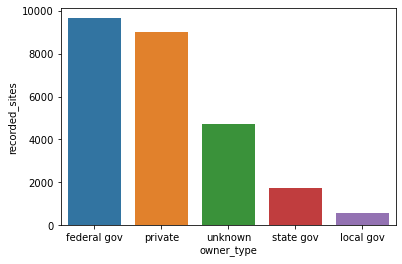

In [19]:
sns.barplot(data = ownership, x = "owner_type", y = "recorded_sites")

### count of sites by prehistoric site type

In [20]:
prehistoric_types = sites_df.PrehType.value_counts()
prehistoric_types

open habitation                                                              16528
                                                                              6410
rock shelter                                                                  1123
open habitation, prehistoric cemetery                                          173
isolated non-diagnostic artifact                                               148
                                                                             ...  
open habitation, platform mound, shell mound/midden, prehistoric cemetery        1
open habitation, pleistocene fauna                                               1
open habitation, prehistoric cemetery, indeterminate mound                       1
stone mound, isolated burial(s)                                                  1
Fish weir                                                                        1
Name: PrehType, Length: 126, dtype: int64

### count of sites by historic site type

In [21]:
historic_types = sites_df.HistType.value_counts()
historic_types

                                                                                                        16830
rural domestic house                                                                                     1601
rural domestic scatter                                                                                   1221
untyped historic scatter                                                                                 1003
rural domestic farmstead                                                                                  880
                                                                                                        ...  
militaryearthwork, entrenchment, priest cap                                                                 1
dump, untyped historic scatter                                                                              1
millgrist, store, ferry                                                                                     1
railroad b

### count of sites by physical division

In [22]:
physical_division = sites_df.PhysioDiv.value_counts()
physical_division

Valley and Ridge        7089
Central Basin           4024
Coastal Plain           3550
Western Highland Rim    3228
Eastern Highland Rim    2001
Unaka Mountains         1808
Cumberland Plateau      1790
Western Valley          1715
Mississippi R Valley     329
Sequatchie Valley        144
                          43
Name: PhysioDiv, dtype: int64

In [23]:
pd.DataFrame(data = physical_division)

,PhysioDiv
Valley and Ridge,7089
Central Basin,4024
Coastal Plain,3550
Western Highland Rim,3228
Eastern Highland Rim,2001
Unaka Mountains,1808
Cumberland Plateau,1790
Western Valley,1715
Mississippi R Valley,329
Sequatchie Valley,144


In [24]:
physical_division = physical_division.reset_index()
physical_division

,index,PhysioDiv
0,Valley and Ridge,7089
1,Central Basin,4024
2,Coastal Plain,3550
3,Western Highland Rim,3228
4,Eastern Highland Rim,2001
5,Unaka Mountains,1808
6,Cumberland Plateau,1790
7,Western Valley,1715
8,Mississippi R Valley,329
9,Sequatchie Valley,144


In [25]:
physical_division = physical_division.rename(columns={"index": "physical_division", "PhysioDiv": "recorded_sites"})
physical_division

,physical_division,recorded_sites
0,Valley and Ridge,7089
1,Central Basin,4024
2,Coastal Plain,3550
3,Western Highland Rim,3228
4,Eastern Highland Rim,2001
5,Unaka Mountains,1808
6,Cumberland Plateau,1790
7,Western Valley,1715
8,Mississippi R Valley,329
9,Sequatchie Valley,144


In [26]:
physical_division = physical_division.replace(" ", "unknown")
physical_division

,physical_division,recorded_sites
0,Valley and Ridge,7089
1,Central Basin,4024
2,Coastal Plain,3550
3,Western Highland Rim,3228
4,Eastern Highland Rim,2001
5,Unaka Mountains,1808
6,Cumberland Plateau,1790
7,Western Valley,1715
8,Mississippi R Valley,329
9,Sequatchie Valley,144


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Valley and Ridge'),
  Text(1, 0, 'Central Basin'),
  Text(2, 0, 'Coastal Plain'),
  Text(3, 0, 'Western Highland Rim'),
  Text(4, 0, 'Eastern Highland Rim'),
  Text(5, 0, 'Unaka Mountains'),
  Text(6, 0, 'Cumberland Plateau'),
  Text(7, 0, 'Western Valley'),
  Text(8, 0, 'Mississippi R Valley'),
  Text(9, 0, 'Sequatchie Valley'),
  Text(10, 0, 'unknown')])

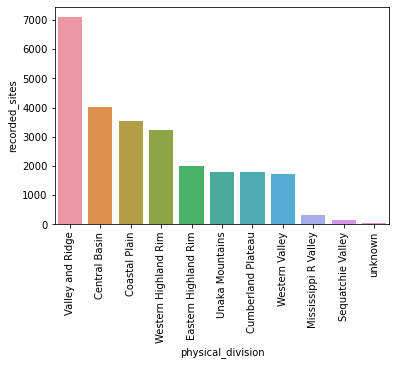

In [63]:
sns.barplot(data = physical_division, x = "physical_division", y = "recorded_sites")
plt.xticks(rotation = 90)

### count of sites by land use type

In [28]:
land_use = sites_df.LandUse.value_counts()
land_use

Cultivation                5435
Inundated/Riverbank        4348
Grassland/Pasture/Yard     4132
Unimproved Forest          3773
Secondary Growth           2946
                           2758
Other                       606
Urban                       529
Open and Eroded             428
Roadway                     356
Improved Forest/Orchard     310
Intermittent Flooding        97
s                             1
Inundated/Shoreline           1
other                         1
Name: LandUse, dtype: int64

In [29]:
pd.DataFrame(data = land_use)

,LandUse
Cultivation,5435
Inundated/Riverbank,4348
Grassland/Pasture/Yard,4132
Unimproved Forest,3773
Secondary Growth,2946
,2758
Other,606
Urban,529
Open and Eroded,428
Roadway,356


In [30]:
land_use = land_use.reset_index()
land_use

,index,LandUse
0,Cultivation,5435
1,Inundated/Riverbank,4348
2,Grassland/Pasture/Yard,4132
3,Unimproved Forest,3773
4,Secondary Growth,2946
5,,2758
6,Other,606
7,Urban,529
8,Open and Eroded,428
9,Roadway,356


In [31]:
land_use = land_use.rename(columns={"index": "land_use", "LandUse": "recorded_sites"})
land_use

,land_use,recorded_sites
0,Cultivation,5435
1,Inundated/Riverbank,4348
2,Grassland/Pasture/Yard,4132
3,Unimproved Forest,3773
4,Secondary Growth,2946
5,,2758
6,Other,606
7,Urban,529
8,Open and Eroded,428
9,Roadway,356


In [32]:
land_use = land_use.replace(" ", "other")
land_use

,land_use,recorded_sites
0,Cultivation,5435
1,Inundated/Riverbank,4348
2,Grassland/Pasture/Yard,4132
3,Unimproved Forest,3773
4,Secondary Growth,2946
5,other,2758
6,Other,606
7,Urban,529
8,Open and Eroded,428
9,Roadway,356


In [33]:
land_use = land_use.replace("s", "other")
land_use

,land_use,recorded_sites
0,Cultivation,5435
1,Inundated/Riverbank,4348
2,Grassland/Pasture/Yard,4132
3,Unimproved Forest,3773
4,Secondary Growth,2946
5,other,2758
6,Other,606
7,Urban,529
8,Open and Eroded,428
9,Roadway,356


In [34]:
land_use = land_use.replace("Other", "other")
land_use

,land_use,recorded_sites
0,Cultivation,5435
1,Inundated/Riverbank,4348
2,Grassland/Pasture/Yard,4132
3,Unimproved Forest,3773
4,Secondary Growth,2946
5,other,2758
6,other,606
7,Urban,529
8,Open and Eroded,428
9,Roadway,356


In [35]:
land_use = land_use.groupby(by="land_use").sum('recorded_sites')
land_use

,recorded_sites
land_use,
Cultivation,5435
Grassland/Pasture/Yard,4132
Improved Forest/Orchard,310
Intermittent Flooding,97
Inundated/Riverbank,4348
Inundated/Shoreline,1
Open and Eroded,428
Roadway,356
Secondary Growth,2946


In [36]:
land_use = land_use.reset_index()
land_use

,land_use,recorded_sites
0,Cultivation,5435
1,Grassland/Pasture/Yard,4132
2,Improved Forest/Orchard,310
3,Intermittent Flooding,97
4,Inundated/Riverbank,4348
5,Inundated/Shoreline,1
6,Open and Eroded,428
7,Roadway,356
8,Secondary Growth,2946
9,Unimproved Forest,3773


In [37]:
land_use = land_use.sort_values(by = 'recorded_sites', ascending = False)
land_use

,land_use,recorded_sites
0,Cultivation,5435
4,Inundated/Riverbank,4348
1,Grassland/Pasture/Yard,4132
9,Unimproved Forest,3773
11,other,3366
8,Secondary Growth,2946
10,Urban,529
6,Open and Eroded,428
7,Roadway,356
2,Improved Forest/Orchard,310


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Cultivation'),
  Text(1, 0, 'Inundated/Riverbank'),
  Text(2, 0, 'Grassland/Pasture/Yard'),
  Text(3, 0, 'Unimproved Forest'),
  Text(4, 0, 'other'),
  Text(5, 0, 'Secondary Growth'),
  Text(6, 0, 'Urban'),
  Text(7, 0, 'Open and Eroded'),
  Text(8, 0, 'Roadway'),
  Text(9, 0, 'Improved Forest/Orchard'),
  Text(10, 0, 'Intermittent Flooding'),
  Text(11, 0, 'Inundated/Shoreline')])

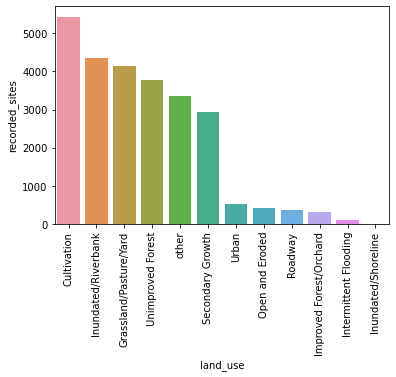

In [75]:
sns.barplot(data = land_use, x = "land_use", y = "recorded_sites")
plt.xticks(rotation = 90)


### count of sites by reporter type

In [39]:
reporter_type = sites_df.RptrType.value_counts()
reporter_type

Private Consultant                 7663
Government Agency                  6689
Educational Institution            4993
                                   4672
Avocational Archaeologist           642
Private Individual                  533
Student Volunteered Report          263
Professional Volunteered Report     249
Landowner                            17
Name: RptrType, dtype: int64

In [40]:
pd.DataFrame(data=reporter_type)

,RptrType
Private Consultant,7663
Government Agency,6689
Educational Institution,4993
,4672
Avocational Archaeologist,642
Private Individual,533
Student Volunteered Report,263
Professional Volunteered Report,249
Landowner,17


In [41]:
reporter_type = reporter_type.reset_index()
reporter_type

,index,RptrType
0,Private Consultant,7663
1,Government Agency,6689
2,Educational Institution,4993
3,,4672
4,Avocational Archaeologist,642
5,Private Individual,533
6,Student Volunteered Report,263
7,Professional Volunteered Report,249
8,Landowner,17


In [42]:
reporter_type = reporter_type.rename(columns={"index": "reporter_type", "RptrType": "recorded_sites"})
reporter_type

,reporter_type,recorded_sites
0,Private Consultant,7663
1,Government Agency,6689
2,Educational Institution,4993
3,,4672
4,Avocational Archaeologist,642
5,Private Individual,533
6,Student Volunteered Report,263
7,Professional Volunteered Report,249
8,Landowner,17


In [43]:
reporter_type = reporter_type.replace(" ", "unknown")
reporter_type

,reporter_type,recorded_sites
0,Private Consultant,7663
1,Government Agency,6689
2,Educational Institution,4993
3,unknown,4672
4,Avocational Archaeologist,642
5,Private Individual,533
6,Student Volunteered Report,263
7,Professional Volunteered Report,249
8,Landowner,17


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Private Consultant'),
  Text(1, 0, 'Government Agency'),
  Text(2, 0, 'Educational Institution'),
  Text(3, 0, 'unknown'),
  Text(4, 0, 'Avocational Archaeologist'),
  Text(5, 0, 'Private Individual'),
  Text(6, 0, 'Student Volunteered Report'),
  Text(7, 0, 'Professional Volunteered Report'),
  Text(8, 0, 'Landowner')])

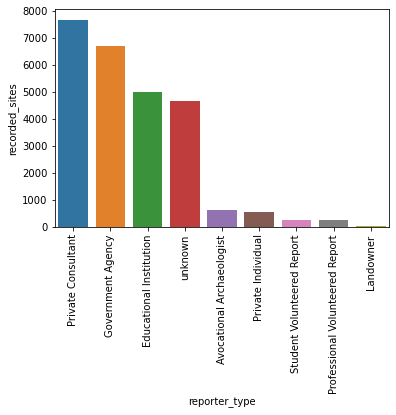

In [65]:
sns.barplot(data = reporter_type, 
           x = "reporter_type", 
           y = "recorded_sites")
plt.xticks(rotation = 90)

### count of sites by survey level

In [45]:
survey_level = sites_df.SurvLevel.value_counts()
survey_level

Shovel Testing                      14013
Reconnaissance/Field Observation     8150
Test Units                           2057
Thematic/Archival                     678
                                      560
Excavation                            263
Name: SurvLevel, dtype: int64

In [46]:
pd.DataFrame(data = survey_level)

,SurvLevel
Shovel Testing,14013
Reconnaissance/Field Observation,8150
Test Units,2057
Thematic/Archival,678
,560
Excavation,263


In [47]:
survey_level = survey_level.reset_index()
survey_level

,index,SurvLevel
0,Shovel Testing,14013
1,Reconnaissance/Field Observation,8150
2,Test Units,2057
3,Thematic/Archival,678
4,,560
5,Excavation,263


In [48]:
survey_level = survey_level.rename(columns={"index": "survey_level", "SurvLevel": "recorded_sites"})
survey_level

,survey_level,recorded_sites
0,Shovel Testing,14013
1,Reconnaissance/Field Observation,8150
2,Test Units,2057
3,Thematic/Archival,678
4,,560
5,Excavation,263


In [49]:
survey_level = survey_level.replace(" ", "unknown")
survey_level

,survey_level,recorded_sites
0,Shovel Testing,14013
1,Reconnaissance/Field Observation,8150
2,Test Units,2057
3,Thematic/Archival,678
4,unknown,560
5,Excavation,263


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Shovel Testing'),
  Text(1, 0, 'Reconnaissance/Field Observation'),
  Text(2, 0, 'Test Units'),
  Text(3, 0, 'Thematic/Archival'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'Excavation')])

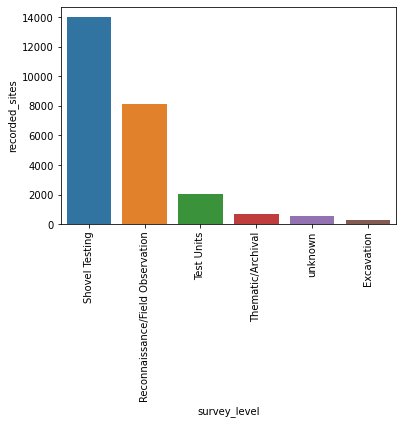

In [73]:
sns.barplot(data = survey_level, 
           x = "survey_level", 
           y = "recorded_sites")
plt.xticks(rotation = 90)